# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
number_of_mice = merged_df['Mouse ID'].nunique()
print(f"Number of mice in the study: {number_of_mice}")



Number of mice in the study: 249


In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df.duplicated(subset = ["Mouse ID", "Timepoint"])

# Count the number of duplicate rows with the same Mouse ID AND Timepoint
number_of_duplicates = duplicate_rows.sum()

# Print the results 
print(f"Number of duplicate rows with the same Mouse ID and Timepoint: {number_of_duplicates}")


Number of duplicate rows with the same Mouse ID and Timepoint: 5


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
if number_of_duplicates > 0:
    duplicate_mice = merged_df[duplicate_rows]
    print("\nData for duplicate mice:")
    print(duplicate_mice)



Data for duplicate mice:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {number_mice_clean}")

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Calculate the mean of Tumor Volume
tumor_volume_mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().rename("Mean")

# Calculate the median of Tumor Volume
tumor_volume_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().rename("Median")

# Calculate the Variance of Tumor Volume
tumor_volume_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().rename("Variance")

# Calculate the Standard Deviation of Tumor Volume
tumor_volume_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().rename("Standard Deviation")

# Calculate the SEM of Tumor Volume 
tumor_volume_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().rename("SEM")

# Assemble the resulting series into a single summary DataFrame
organized_tumor_data = pd.DataFrame({
    'Mean': tumor_volume_mean,
    'Median': tumor_volume_median,
    'Variance': tumor_volume_variance,
    'Standard Deviation': tumor_volume_std,
    'SEM': tumor_volume_sem}
 
                                   )

# Display the statistics
organized_tumor_data



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
## A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_summary.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<Axes: title={'center': 'Number of Mice/Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice/Timepoints'>

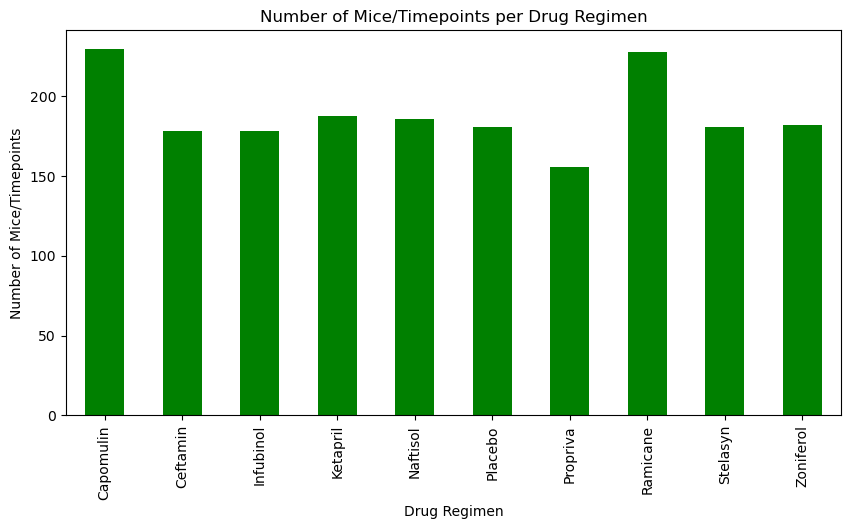

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df.groupby("Drug Regimen").size()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice/Timepoints")
plt.title("Number of Mice/Timepoints per Drug Regimen")
drug_regimen_counts.plot.bar(title = "Number of Mice/Timepoints per Drug Regimen", y = "Number of Mice/Timepoints", color = "green", figsize = (10, 5))



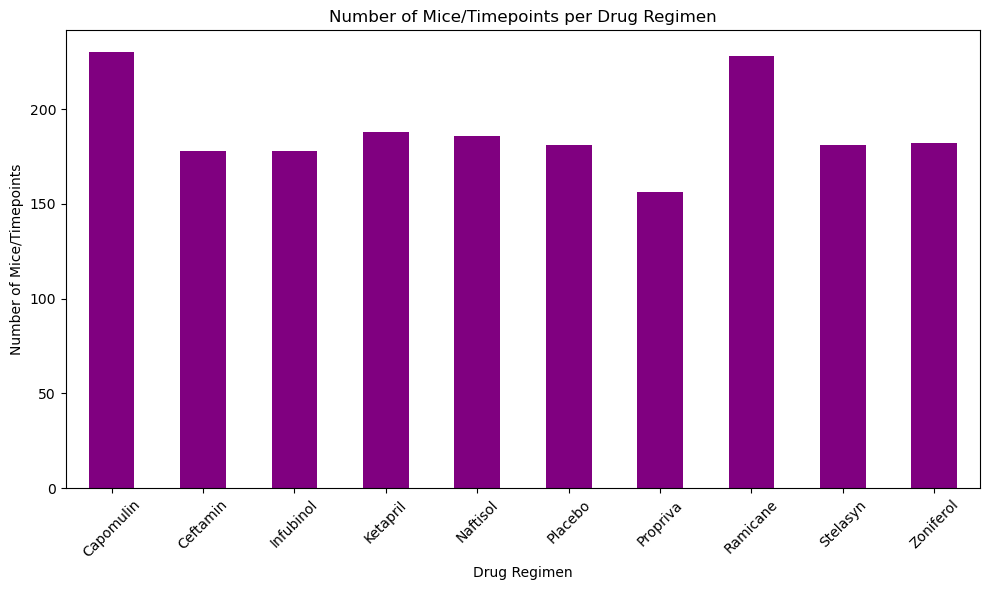

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df.groupby("Drug Regimen").size()

drug_regimen_counts.plot(kind = "bar", color = "purple", figsize = (10, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice/Timepoints")
plt.title("Number of Mice/Timepoints per Drug Regimen")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

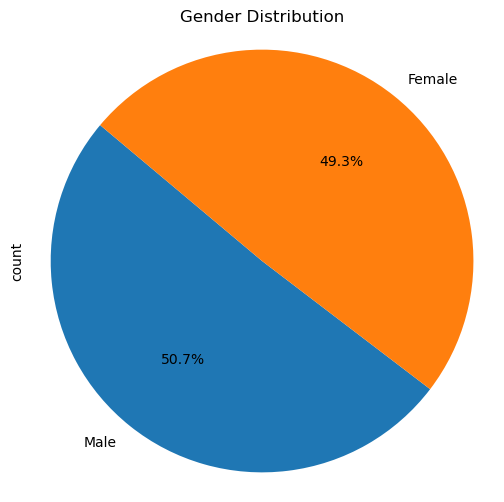

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count gender distribution 
gender_counts = clean_df["Sex"].value_counts()

# Generate pie plot using pandas
gender_counts.plot.pie(autopct = "%1.1f%%", startangle = 140, figsize = (6,6))
plt.title("Gender Distribution")
plt.axis("equal")
plt.show


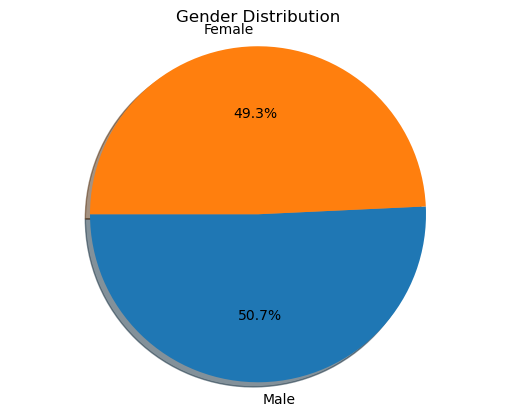

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Extract gender data
gender_data = clean_df["Sex"].value_counts()

# Extract labels and sizes for the pie chart 
labels = gender_data.index.to_list()
sizes = gender_data.to_list()

# Generate pie plots using pyplot 
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle = 180, shadow =True)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter for each treatment regimen
filtered_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_df.groupby("Mouse ID").tail(1)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df, filtered_df, on = ["Mouse ID", "Timepoint"])

# Display final tumor volume 
final_tumor_volume

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,Capomulin,Female,3,17,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,Capomulin,Female,16,15,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3,Ceftamin,Male,3,29,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3,Infubinol,Female,17,27,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4,Ceftamin,Female,6,27,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3,Ceftamin,Male,23,26,64.729837,3


In [109]:
# Leverage vectorized operations for efficiency
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
results = []
for treatment in treatments:
    filtered_df = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]
    tumor_volume = filtered_df["Tumor Volume (mm3)_x"]

    # Calculate IQR, bounds, and outliers efficiently
    q1, q3 = tumor_volume.quantile([0.25, 0.75])  
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = tumor_volume.between(lower_bound, upper_bound,)

    # Store results for summary
    num_mice = len(filtered_df)
    num_outliers = outliers.sum()
    results.append({
        "Treatment": treatment,
        "Number of mice": num_mice,
        "IQR": iqr,
        "Number of potential outliers": num_outliers,
        "Outliers": outliers.index.tolist()  # Directly access outlier indices
    })

# Print concise summary
for result in results:
    print(result)



{'Treatment': 'Capomulin', 'Number of mice': 0, 'IQR': nan, 'Number of potential outliers': 0, 'Outliers': []}
{'Treatment': 'Ramicane', 'Number of mice': 0, 'IQR': nan, 'Number of potential outliers': 0, 'Outliers': []}
{'Treatment': 'Infubinol', 'Number of mice': 0, 'IQR': nan, 'Number of potential outliers': 0, 'Outliers': []}
{'Treatment': 'Ceftamin', 'Number of mice': 25, 'IQR': 15.577752179999997, 'Number of potential outliers': 25, 'Outliers': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}


## Line and Scatter Plots

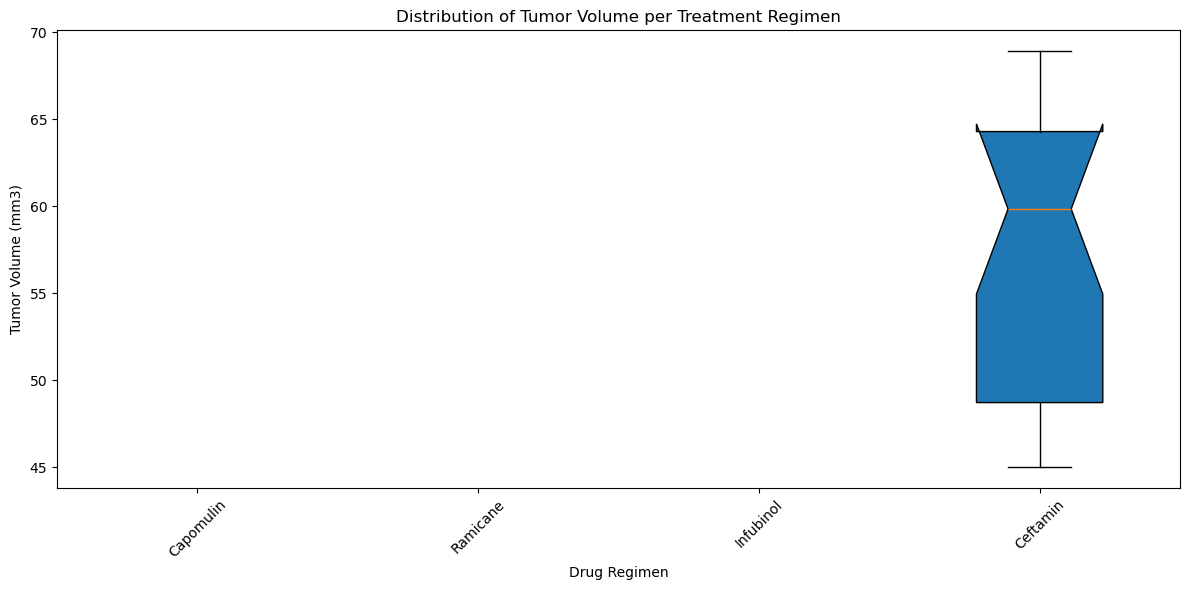

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)_x"] for treatment in treatments]
if len(tumor_volumes) > 0:
    plt.figure(figsize=(12, 6))
    plt.boxplot(tumor_volumes, notch=True, patch_artist=True, labels=treatments)
    plt.xlabel("Drug Regimen")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title("Distribution of Tumor Volume per Treatment Regimen")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


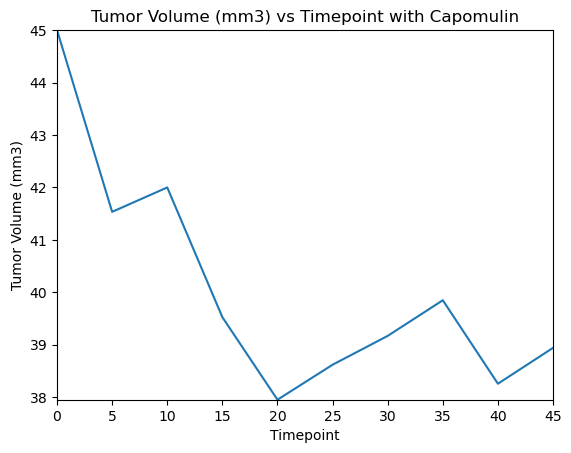

In [115]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_set = clean_df[clean_df['Drug Regimen']== 'Capomulin']

# Choose a mouse
mouse = capo_set.loc[capo_set['Mouse ID'] == 'b742']

# Create the X and Y axis list
timepoints = [0,5,10,15,20,25,30,35,40,45]

# Set the chart labels
plt.title('Tumor Volume (mm3) vs Timepoint with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim(0,45)
plt.ylim(mouse['Tumor Volume (mm3)'].min(),mouse['Tumor Volume (mm3)'].max())

plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])

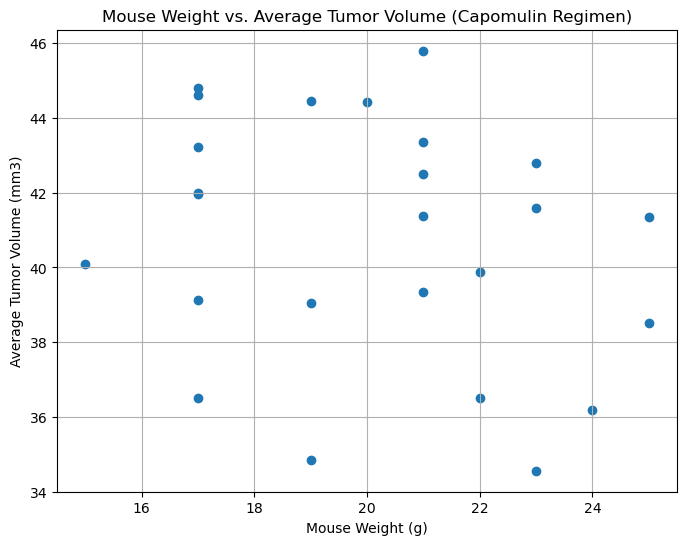

In [118]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. average tumor volume for Capomulin
capomulin_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.drop_duplicates("Mouse ID")["Weight (g)"]

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient: -0.23201324646524457
Linear regression model: y = -0.26x + 46.05


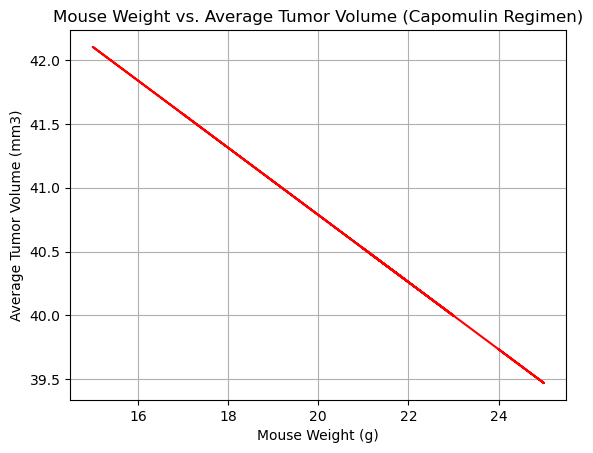

In [121]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, average_tumor_volume)[0]
print("Correlation coefficient:", correlation)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print("Linear regression model:", line_eq)

# Add the regression line to the scatter plot
plt.plot(mouse_weight, regress_values, color='red')  # Add regression line in red

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.grid(True)
plt.show()


